In [40]:

import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen, GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import netCDF4 as nc
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import array as arr
import seaborn as sns
import datetime
from scipy import interpolate
import cmocean

In [41]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

plt.rcParams['font.size']= 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.labelsize'] = 15

In [3]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor=cfeature.COLORS['land'])
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])

# Load SG data

In [68]:
# Load Seaglider 644
fname_sg644 = glob.glob('E:/PolarFront2022/2022-05/seaglider/2022_polarfront_seaglider_sg644/netcdf/p*.nc')

time_644 = np.zeros((0))
lat_644 = np.zeros((0))
lon_644 = np.zeros((0))
temp_644 = np.zeros((0))
sal_644 = np.zeros((0))

for ind in np.arange(len(fname_sg644)):
    sg_644 = nc.Dataset(fname_sg644[ind])
    
    time_644 = np.append(temp_644, sg_644.variables['time'][0])
    lat_644 = np.append(lat_644, sg_644.variables['latitude'][0])
    lon_644 = np.append(lon_644, sg_644.variables['longitude'][0])
    sal_644 = np.append(sal_644, sg_644.variables['salinity'][0])
    temp_644 = np.append(temp_644, sg_644.variables['temperature'][0])
    
    
    

In [69]:
# Load Seaglider 153
fname_sg153 = glob.glob('E:/PolarFront2022/2022-05/seaglider/2022_polarfront_seaglider_sg153/netcdf/p*.nc')


lat_153 = np.zeros((0))
lon_153 = np.zeros((0))


for ind in np.arange(len(fname_sg153)):
    sg_153 = nc.Dataset(fname_sg153[ind])
    

    lat_153 = np.append(lat_153, sg_153.variables['latitude'][0])
    lon_153 = np.append(lon_153, sg_153.variables['longitude'][0])

    
    

# Load bathymetry

In [70]:
BS_topo = nc.Dataset("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/BarentsSeaBathy.nc")

In [71]:
lat_lim = [70, 80]
lon_lim = [5, 45]

lat_lim_index = (BS_topo.variables['lat'][:].data>lat_lim[0]) & (BS_topo.variables['lat'][:].data<lat_lim[1])
lon_lim_index = (BS_topo.variables['lon'][:].data>lon_lim[0]) & (BS_topo.variables['lon'][:].data<lon_lim[1])

lats = BS_topo.variables['lat'][:].data[lat_lim_index]
lons = BS_topo.variables['lon'][:].data[lon_lim_index]
bathy_lat = BS_topo.variables['elevation'][:].data[lat_lim_index,:]
bathy = bathy_lat[:,lon_lim_index]*-1
bathy[bathy < 0] = 1 

# Plot trajectory

Text(0.5, -0.1, 'Longitude')

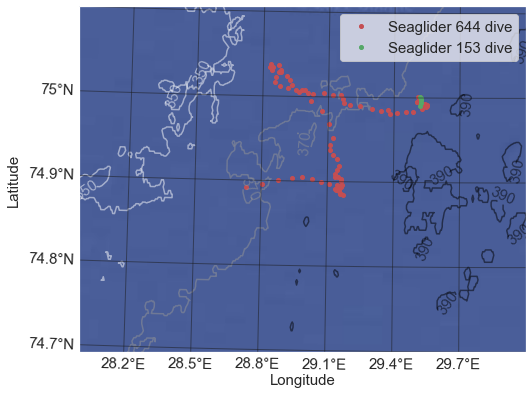

In [72]:
fig   = plt.figure(figsize=(8,12))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 30, central_latitude = 75)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[28, 30, 74.7, 75.1]
ax.set_extent(extent, crs = ccrs.PlateCarree())


# Add the Stamen aerial imagery at zoom level 7.
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

cs = ax.contour(lons,lats,bathy, levels=[350, 370, 390], cmap='Greys', alpha = 0.5, transform=ccrs.PlateCarree())
plt.clabel(cs)

# Add transects 2021
plt.plot(lon_644,lat_644,'r.', markersize=8, transform=ccrs.PlateCarree(), label="Seaglider 644 dive")
plt.plot(lon_153,lat_153,'g.', markersize=8, transform=ccrs.PlateCarree(), label="Seaglider 153 dive")

plt.legend(fontsize=15)

# Add axes labels

ax.text(-.13, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=15)
ax.text(0.5, -.10, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=15)



##fig.savefig('PF_SB_transects.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

## Plot hydrographic results

In [75]:
#SG_644 & SG_153 In matlab -> sg_vis.m